# NEAREST NEIGHBORS

# LOAD THE DEPENDANCIES

## Pandas

In [471]:
import pandas as pd
from pandas import set_option
from pandas.plotting import scatter_matrix

## Numpy

In [472]:
import numpy as np
from numpy import set_printoptions


## Matplotlib & Seaborn

In [473]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

## sklearn

In [474]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import cross_val_score
from sklearn import datasets

## math & stats

In [475]:
from scipy import stats
import math

## system

In [476]:
import os
import sys
# sys.path.insert(0, "C:\\Users\\Crystal\\Desktop\\Programs\\my-modules-and-libraries")

## notebook widgets

In [477]:
# import ipywidgets as widgets
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"

# FUNCTIONS

In [478]:
#### KNN Classifier

def KNN(k,X_train,y_train,X_test,y_test):
    """KNN algorithm"""
    global classifier
    
    f1_scores=[]
    accur=[]
    preci=[]
    recall=[]
    for i in k:
        
        # Define KNN Model
        classifier = KNeighborsClassifier(n_neighbors=i, weights='uniform', algorithm='auto',
                                           leaf_size=30, p=3, metric='minkowski',metric_params=None)
        # Fit Model
        classifier.fit(X_train,y_train)

        y_pred = classifier.predict(X_test)
        
        y_prob=classifier.predict_proba(X_test)
        
        y_prob=y_prob[:,1]
        
        f1,a,p,r=metrics(y_test, y_pred)

        
        
        f1_scores.append(f1)
        accur.append(a)
        preci.append(p)
        recall.append(r)
        
    print('\n','f1_scores: ',f1_scores)
    print('accuracy: ',accur)
    
    return f1_scores,accur,preci,recall,y_pred,y_prob
        
        

In [479]:
#### Evaluate Model

def metrics(y_test, y_pred):
    """Confusion matrix and associated metrics"""
    matrix = confusion_matrix(y_test, y_pred)
    y_test=y_test.values.reshape(y_test.size)
#     tn,fp,fn,tp=confusion_matrix(y_test, y_pred).ravel()
    precision=precision_score(y_test,y_pred,average=None)
    recall=recall_score(y_test,y_pred,average=None)
    f1=f1_score(y_test,y_pred,average=None)
    accuracy=accuracy_score(y_test,y_pred)
#     print('Confusion matrix breakdown:',('tn:',tn,'fp:',fp,'fn:',fn,'tp:',tp),'\n')
    print('Confusion matrix:\n', matrix)
    confusion_matrix_plot(matrix)
    print('Precision: When it predicts yes, how often is it correct?:',precision)
    print('Recall.True Positive Rate: When it\'s actually yes, how often does it predict yes?:',recall)
    print('F1:score is the harmonic average of the precision and recall,:',f1)
    print('Accuracy.Overall, how often is the classifier correct?: ',accuracy)
    print('Misclassification Rate.Overall, how often is it wrong?: ',(1-accuracy))

    return (f1,accuracy,precision,recall)
    


In [480]:
def confusion_matrix_plot(matrix):
    cm=matrix
    print(classes)
    fig, ax = plt.subplots()
    cmap=plt.cm.Blues
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes,
           yticklabels=classes,
           title="confusion",
           ylabel='True label',
           xlabel='Predicted label')



    # Loop over data dimensions and create text annotations.
    normalize=False
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()



    plt.show()

## PREPROCESSING: Replacing zeros where it is not a valid value for that feature.
##### This done here by replacing the zero values with a NAN, then replacing the NAN with the average value for non-zero values in that column

In [481]:
def replacing_zeros(dataset,the_headers):
    """Function used to remove zeros from numeric features when 0 is not practical"""

    for header in the_headers:
        dataset[header]=dataset[header].replace(0,np.nan)
        mean=int(dataset[header].mean(skipna=True))
        dataset[header]=dataset[header].replace(np.nan,mean)
        
    return dataset


## PREPROCESSING: Split the dataset

In [482]:
def split_the_dataset(dataset,input_headers,target_header):
    
    X=dataset[input_headers]
    y=dataset[target_header]
    
    X.head()
    
    return X,y

## PREPROCESSING: Quick look at the features

In [483]:
def quick_feature_view(X):
    

    # X.hist(bins=50,figsize=(15,15))
    # X.plot(kind='hist',subplots=True,layout=(3,3),sharex=False, figsize=(15,15))

    headers=X.columns.tolist()
    fig, axes = plt.subplots(nrows=1, ncols=len(headers), figsize=(20, 10))
    print(headers)
    for i,head in enumerate(headers,0):

        axes[i].hist(x=X[head],bins=50,edgecolor='black')
        axes[i].set(title=head)
        axes[i].grid()

    plt.show()

    X.plot(kind='density',subplots=True,layout=(3,3),sharex=False, figsize=(15,15))
    plt.show()

## PREPROCESSING:Target Summary

In [484]:
def target_summary(dataset,target_header):
    """PREPROCESSING:Target Summary"""
    print(dataset.groupby(target_header).size())
    print((dataset.groupby(target_header).size()/len(y)*100))


## PREPROCESSING:Train - Test Split of the data

In [485]:
def split_the_train_test_data(X,y):
    
    """PREPROCESSING:Train - Test Split of the data"""
    X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=.20,random_state=42,shuffle=True)
#     X_train.head()
    
    return X_train,X_test,y_train,y_test

## PREPROCESSING: Feature Scaling

In [486]:
def feature_scaling(X_train,X_test):
    sc_X=StandardScaler()
    X_train=sc_X.fit_transform(X=X_train,y=None)
    X_test=sc_X.fit_transform(X=X_test,y=None)

    print(sc_X.fit(X_train))
    print(X_train[0:5])
    
    return X_train, X_test



## Model Parameters:Choose a value of k by taking the sqrt of the number of data points

In [487]:
def select_k_value(y_test,list_or_single):
    
    y_test.size
    
    if (list_or_single.lower()=='s'):
        k=round(math.sqrt(y_test.size))
        
        if (k%2==0):
            k_list=[]
            k_list.insert(0,k-1)
            k_list.insert(1,k+1)
            k=k_list
    else:
        k=[3,5,7,9,11,13,15,17,19,21]
        
    print ('Selected k value(s):\n',k)
    return k
    

## Plotting

In [488]:
def plot_the_metrics(f1_scores,accur,preci,recall):

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10),sharex='none')
    axes[0,0].plot(k,f1_scores,marker='o')
    axes[0,1].plot(k,accur,marker='o')
    axes[0,0].set(title='F1 Score')
    axes[0,1].set(title='Accuracy')
    axes[0,0].set(xlabel='K value')
    axes[0,1].set(xlabel='K value')
#     axes[0,0].set(xlim=(3,21), ylim=(0,1))
#     axes[0,1].set(xlim=(3,21), ylim=(0,1))
    axes[0,0].set(xticks=range(3,23,2),yticks=np.arange(0,1.1,.1))
    axes[0,1].set(xticks=range(3,23,2),yticks=np.arange(0,1.1,.1))
    axes[0,0].grid()
    axes[0,1].grid()

    axes[1,0].plot(k,preci,marker='o')
    axes[1,1].plot(k,recall,marker='o')
    axes[1,0].set(title='Precision')
    axes[1,1].set(title='Recall')
    axes[1,0].set(xlabel='K value')
    axes[1,1].set(xlabel='K value')
#     axes[1,0].set(xlim=(3,21), ylim=(0,1))
#     axes[1,1].set(xlim=(3,21), ylim=(0,1))
    axes[1,0].set(xticks=range(3,23,2),yticks=np.arange(0,1.1,.1))
    axes[1,1].set(xticks=range(3,23,2),yticks=np.arange(0,1.1,.1))
    axes[1,0].grid()
    axes[1,1].grid()

    plt.show()

In [489]:
def box_plot_the_metrics(f1_scores,accur,preci,recall):
    """Box plots for the classification metrics over a range of parameter adjustments"""
    
    f=np.asarray(f1_scores)
    a=np.asarray(accur)
    p=np.asarray(preci)
    r=np.asarray(recall)
    
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
#     axes.boxplot([f,a,p,r])
    axes.boxplot(a)
    axes.set_xticklabels(['accuracy'])
#     axes.set_xticklabels(['f1_score','accuracy','precision','recall'])
    plt.grid()
    
    plt.show()
    

In [490]:
def plot_of_data_space(dataset,data,labels,input_headers):
    
    
    xx_1=pd.DataFrame(data[:,0]) 
    xx_2=pd.DataFrame(data[:,1]) 
    y=pd.DataFrame(labels)
    
   
    plt.figure(figsize=(15,10)) 
    b=plt.scatter(xx_1[y==0],xx_2[y==0],color='b') 
    r=plt.scatter(xx_1[y==1],xx_2[y==1],color='r')
    g=plt.scatter(xx_1[y==2],xx_2[y==2],color='g') 
    bl=plt.scatter(xx_1[y==3],xx_2[y==3],color='black')
    
    
#     for i in range(0,len(xx_1)):
#         print(y[i])
#         if (y[i]==0):
#             a=plt.scatter(xx_1[i],xx_2[i],marker='o',color='blue',s=30)
#         if (y[i]==1):
#             b=plt.scatter(xx_1[i],xx_2[i],marker='o',color='red',s=30)
#         if (y[i]==2):
#             c=plt.scatter(xx_1[i],xx_2[i],marker='o',color='green',s=30)
#         if (y[i]==3):
#             d=plt.scatter(xx_1[i],xx_2[i],marker='o',color='black',s=30)
        
#     plt.xlabel(f1);plt.ylabel(f2);
#     plt.legend((a,b),tuple(np.unique(labels)))

    plt.xlabel(input_headers[0])
    plt.ylabel(input_headers[1])

    plt.grid()
    plt.legend((b,r,g,bl),tuple(np.unique(labels)))
    plt.show()


In [491]:
def boundary_decision_plot(X,y,X_train,y_train,x_test,y_pred,y_prob):
    
    X_unscaled=X.values
    X_scaled, dummy=feature_scaling(X_unscaled,X_test=np.ones((2,2)))
    xx_1=pd.DataFrame(X_train[:,0]) 
    xx_2=pd.DataFrame(X_train[:,1]) 
    y=pd.DataFrame(y_train.values)
    
#     print(y_train[0:5])
#     print(X_train[0:5])

    xx_test_1=pd.DataFrame(x_test[:,0]) 
    xx_test_2=pd.DataFrame(x_test[:,1])

    y_predict=pd.DataFrame(y_pred) 
    y_prob=pd.DataFrame(y_prob) 

    cmap_light = ListedColormap(['#FFAAAA','#AAAAFF'])

#     cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    cmap_bold = ListedColormap(['#FF0000','#0000FF'])

    h=.02

#     Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
#     x1=X_train[:,0] 
    x1=X_scaled[:,0]
    x2=X_scaled[:,1] 
    x_min,x_max = x1.min()-1,x1.max()+1 
    y_min,y_max = x2.min()-1,x2.max()+1 
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))


    the_predict=classifier.predict(np.c_[xx.ravel(),yy.ravel()])

#     Put the result into a color plot
    Z = the_predict.reshape(xx.shape) 
    plt.figure(figsize=(15,15)) 
    plt.xlim(xx.min(),xx.max()) 
    plt.ylim(yy.min(),yy.max())

    plt.pcolormesh(xx,yy,Z,cmap=cmap_light)

#     plt.scatter(xx_1[y==0],xx_2[y==0],color='b',marker='o') 
#     plt.scatter(xx_1[y==1],xx_2[y==1],color='r',marker='o')
    

#     plt.scatter(X_train[:,0],X_train[:,1],s=40,c=y_train,cmap=plt.cm.Spectral)
    cm=plt.cm.get_cmap('RdYlBu_r')

#     plt.scatter(xx_test_1[y_predict==0],xx_test_2[y_predict==0],cmap=cm,vmin=0,vmax=1,c=y_predict,marker='D') 
#     plt.scatter(xx_test_1[y_predict==1],xx_test_2[y_predict==1],cmap=cm,vmin=0,vmax=1,c=y_predict,marker='D') 
    plt.scatter(xx_test_1[y_predict==0],xx_test_2[y_predict==0],cmap=cm,vmin=0,vmax=1,c=y_prob,marker='D') 
    plt.scatter(xx_test_1[y_predict==1],xx_test_2[y_predict==1],cmap=cm,vmin=0,vmax=1,c=y_prob,marker='D') 
    plt.colorbar()


    plt.grid() 
    plt.show()


In [492]:
def max_results(f1_scores,accur,preci,recall,k):
    
    f=np.asarray(f1_scores)
    a=np.asarray(accur)
    p=np.asarray(preci)
    r=np.asarray(recall)
    k=np.asarray(k)
    
    results=f"""\n
    The max F1 SCORE is {round((f.max()*100),1)}% with a K value of {k[np.argmax(f)]}\n
    The max ACCURACY is {round((a.max()*100),1)}% with a K value of {k[np.argmax(a)]}\n
    The max PRECISION is {round((p.max()*100),1)}% with a K value of {k[np.argmax(p)]}\n
    The max RECALL is {round((r.max()*100),1)}% with a K value of {k[np.argmax(r)]}
    """
    
    print(results)
    
    
    
    
    

## Label Encoding

In [493]:
def label_encoding(dataset,input_headers):
    
    for i in input_headers:
        
        the_data_type=dataset[i].dtype.name
        if (the_data_type=='object'):
            lable_enc=preprocessing.LabelEncoder()
            lable_enc.fit(dataset[i])
            labels=lable_enc.classes_   #this is an array
            labels=list(labels) #converting the labels array to a list
            print(labels)
            dataset[i]=lable_enc.transform(dataset[i])

            return labels
    
        else:
            return list(np.unique(dataset[i]))
    

# MAIN PROGRAM

In [494]:
if __name__ == "__main__":
    
    global classifier, classes
    
#     RETRIEVE THE DATASET


    location=r'C:\Users\Crystal\Desktop\Programs\dataset_repo\LCDS Datasets\heart_failure_clinical_records_dataset.csv'
    dataset=pd.read_csv(location)

    dataset.info()
    dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [495]:
    # Replace zeros with the mean where needed.
    rz=input('Do you need to replace any zeros in the dataset?')
    the_headers=[None]
    if (rz.lower()=='y'):
        replacing_zeros(dataset,the_headers)
        
        

## Selecting inputs and targets

In [496]:
headers=list(dataset.columns)
headers

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'DEATH_EVENT']

In [497]:
target_header=['DEATH_EVENT']
input_headers=['creatinine_phosphokinase',
 'serum_creatinine',
 'serum_sodium']
    
#     target_header=['Survived']
#     input_headers=['Parch','Fare','SibSp','Age','Pclass','Sex','Ticket']

#     target_header=['Species']
#     input_headers=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
    

In [498]:
target_label=label_encoding(dataset,target_header)
target_label

[0, 1]

In [499]:
classes=target_label
test_label=label_encoding(dataset,input_headers)
# test_label

In [500]:
X,y=split_the_dataset(dataset,input_headers,target_header)
#     print(y.values)
if (X.values.shape[1]==2):
    plot_of_data_space(dataset,X.values,y.values,input_headers)
    
print(X.head())

creatinine_phosphokinase  serum_creatinine  serum_sodium
0                       582               1.9           130
1                      7861               1.1           136
2                       146               1.3           129
3                       111               1.9           137
4                       160               2.7           116


## Splitting the Train-Test data

In [501]:
    
    X_train,X_test,y_train,y_test=split_the_train_test_data(X,y)

    

## Scale the data 

In [502]:
    X_train, X_test=feature_scaling(X_train,X_test)

StandardScaler()
[[-0.35037003 -0.18870542  0.13125912]
 [-0.50593309  1.12060172 -0.54581131]
 [-0.50064183  0.11344238 -0.09443102]
 [-0.47101077 -0.69228509 -0.09443102]
 [ 0.0052027   0.44580496 -0.54581131]]


## Selection of K

In [503]:
    list_or_single=input('(S)ingle or (R)ange of k-values? ')
    k=select_k_value(y_test,list_or_single)

Selected k value(s):
 [7, 9]


## Call the KNN function

Confusion matrix:
 [[30  5]
 [15 10]]
[0, 1]


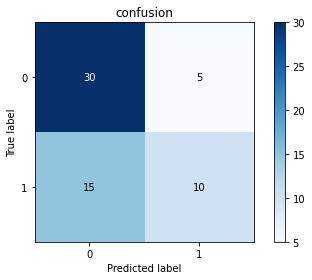

Precision: When it predicts yes, how often is it correct?: [0.66666667 0.66666667]
Recall.True Positive Rate: When it's actually yes, how often does it predict yes?: [0.85714286 0.4       ]
F1:score is the harmonic average of the precision and recall,: [0.75 0.5 ]
Accuracy.Overall, how often is the classifier correct?:  0.6666666666666666
Misclassification Rate.Overall, how often is it wrong?:  0.33333333333333337
Confusion matrix:
 [[31  4]
 [17  8]]
[0, 1]


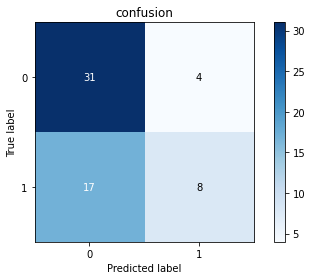

Precision: When it predicts yes, how often is it correct?: [0.64583333 0.66666667]
Recall.True Positive Rate: When it's actually yes, how often does it predict yes?: [0.88571429 0.32      ]
F1:score is the harmonic average of the precision and recall,: [0.74698795 0.43243243]
Accuracy.Overall, how often is the classifier correct?:  0.65
Misclassification Rate.Overall, how often is it wrong?:  0.35

 f1_scores:  [array([0.75, 0.5 ]), array([0.74698795, 0.43243243])]
accuracy:  [0.6666666666666666, 0.65]
[1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0]
[0.88888889 0.22222222 0.11111111 0.66666667 0.22222222 0.11111111
 0.22222222 0.22222222 0.55555556 0.11111111 0.33333333 0.22222222
 0.44444444 0.         0.22222222 0.22222222 0.11111111 0.11111111
 0.11111111 0.11111111 0.33333333 0.33333333 0.77777778 0.11111111
 0.11111111 0.11111111 0.11111111 0.         0.55555556 0.11111111
 0.44444444 0.44444444 0.33333333 

In [504]:
    f1_scores,accur,preci,recall,y_pred,y_prob=KNN(k,X_train,y_train,X_test,y_test)
    print(y_pred)
    print(y_prob)

## Plot the metrics

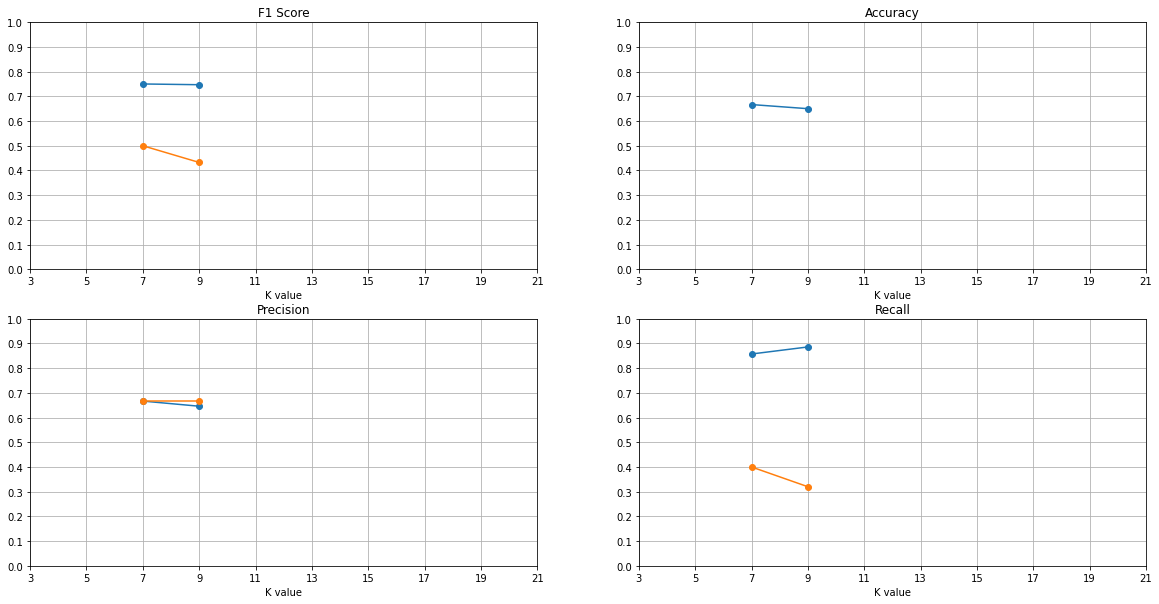

In [505]:
    
    plot_the_metrics(f1_scores,accur,preci,recall)
    

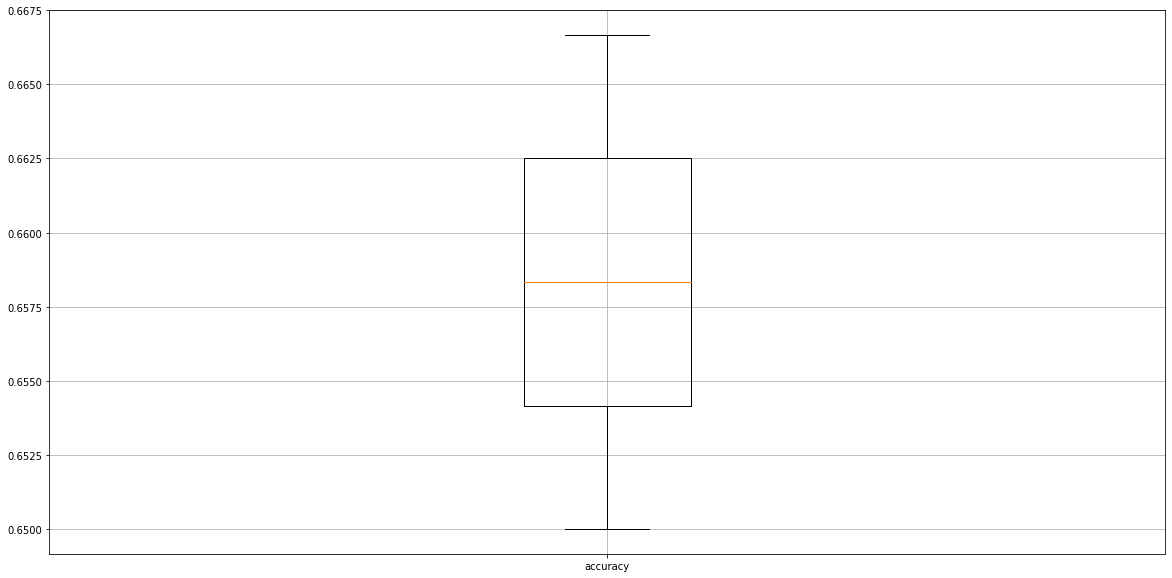

In [506]:
    #Box plot of the metrics
    box_plot_the_metrics(f1_scores,accur,preci,recall)

## Model Score Results

In [507]:
max_results(f1_scores,accur,preci,recall,k)

IndexError: index 2 is out of bounds for axis 0 with size 2

## Plot the decision boundaries 

In [508]:
    if (X.values.shape[1]==2):
        boundary_decision_plot(X,y,X_train,y_train,X_test,y_pred,y_prob)

In [509]:
np.ones((2,2))

array([[1., 1.],
       [1., 1.]])